\begin{equation*}
 Amir Ziaee
\end{equation*}




# Import all neccessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
import os

%matplotlib inline

# Import Dataset

In [2]:
df1=pd.read_csv(str(os.getcwd())+"/MyData.csv")
df1.drop(labels='Unnamed: 0',axis=1,inplace=True)
df1.head()

,quelle,preis,flaeche,pqm,baujahr,stockwerk,zimmer,zustand,balkon,terrasse,...,fenster,belag,bezug,parkett,garage,maisonette,kueche,klima,moebel,jahr
0,1,50000.0,42.0,1190.476190,NaN,NaN,1.5,schlecht,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006.0
1,1,95000.0,62.0,1532.258065,1970.0,4,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006.0
2,1,95000.0,120.0,791.666667,NaN,eg,4.0,schlecht,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006.0
3,1,90000.0,54.0,1666.666667,1966.0,eg,2.0,sehr gut,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006.0
4,1,280000.0,78.0,3589.743590,1965.0,2,3.0,sehr gut,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006.0


# How to work with missing data?

Steps for working with missing data:

   <b> 
       
       1-Identify missing data
    
       2-Deal with missing data
       
       3-Correct data format
   </b>


# 1. Identify and handle missing values:

Convert "?" to NaN

In the home dataset, missing data comes with the question mark "?". 
We replace "?" with NaN (Not a Number), which is Python's default missing value marker, for reasons of computational speed and convenience.

Here we use the function:   .replace(A, B, inplace = True)  to replace A by B

In [4]:
# replace "?" to NaN
df1.replace("?", np.nan, inplace = True)
df1.head(10)

,quelle,preis,flaeche,pqm,baujahr,stockwerk,zimmer,zustand,balkon,terrasse,...,fenster,belag,bezug,parkett,garage,maisonette,kueche,klima,moebel,jahr
0,1,50000.0,42.0,1190.476190,NaN,NaN,1.5,schlecht,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006.0
1,1,95000.0,62.0,1532.258065,1970.0,4,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006.0
2,1,95000.0,120.0,791.666667,NaN,eg,4.0,schlecht,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006.0
3,1,90000.0,54.0,1666.666667,1966.0,eg,2.0,sehr gut,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006.0
4,1,280000.0,78.0,3589.743590,1965.0,2,3.0,sehr gut,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006.0
5,1,280000.0,109.0,2568.807339,1975.0,3,4.0,sehr gut,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006.0
6,1,75000.0,71.0,1056.338028,1974.0,4,2.0,gut,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2006.0
7,1,95000.0,56.0,1696.428571,NaN,2,2.0,gut,NaN,NaN,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2006.0
8,1,165000.0,96.0,1718.750000,NaN,2,3.0,sehr gut,1.0,NaN,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2006.0
9,1,78800.0,40.0,1970.000000,2005.0,NaN,1.0,erstbezug nach sanierung,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006.0


# Identify for Missing Data

The missing values are converted to Python's default. We use Python's built-in functions to identify these missing values. 

There are two methods to detect missing data:


    1-.isnull()
      
    2-.notnull()
      

The output is a boolean value indicating whether the passed in argument value are in fact missing data.

<b> "True" stands for missing value, while "False" stands for not missing value.</b>


In [5]:
missing_data=df1.isnull()
missing_data.head()

,quelle,preis,flaeche,pqm,baujahr,stockwerk,zimmer,zustand,balkon,terrasse,...,fenster,belag,bezug,parkett,garage,maisonette,kueche,klima,moebel,jahr
0,False,False,False,False,True,True,False,False,True,True,...,True,True,True,True,True,True,True,True,True,False
1,False,False,False,False,False,False,False,True,True,True,...,True,True,True,True,True,True,True,True,True,False
2,False,False,False,False,True,False,False,False,True,False,...,True,True,True,True,True,True,True,True,True,False
3,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,False
4,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,False


# Counting missing values in each column

Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value, "False" means the value is present in the dataset. 

In [6]:
for column in missing_data.columns.values.tolist():
    print (column)
    print(missing_data[column].value_counts())
    print(" ")

quelle
False    211295
Name: quelle, dtype: int64
 
preis
False    203072
True       8223
Name: preis, dtype: int64
 
flaeche
False    181217
True      30078
Name: flaeche, dtype: int64
 
pqm
False    176797
True      34498
Name: pqm, dtype: int64
 
baujahr
False    125329
True      85966
Name: baujahr, dtype: int64
 
stockwerk
False    131733
True      79562
Name: stockwerk, dtype: int64
 
zimmer
False    193360
True      17935
Name: zimmer, dtype: int64
 
zustand
False    162027
True      49268
Name: zustand, dtype: int64
 
balkon
True     144483
False     66812
Name: balkon, dtype: int64
 
terrasse
True     128458
False     82837
Name: terrasse, dtype: int64
 
garten
True     190003
False     21292
Name: garten, dtype: int64
 
wc
True     201277
False     10018
Name: wc, dtype: int64
 
loggia
True     185215
False     26080
Name: loggia, dtype: int64
 
keller
False    108443
True     102852
Name: keller, dtype: int64
 
abstellraum
True     168041
False     43254
Name: abstellraum, d

# Showing Missing Ratio of Dataset


In [8]:
all_data_na = (df1.isnull().sum() / len(df1)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()



,Missing Ratio
penthouse,96.943610
klima,95.939800
wc,95.258761
moebel,94.206205
maisonette,90.224094


Text(0.5, 1.0, 'Percent missing data by feature')

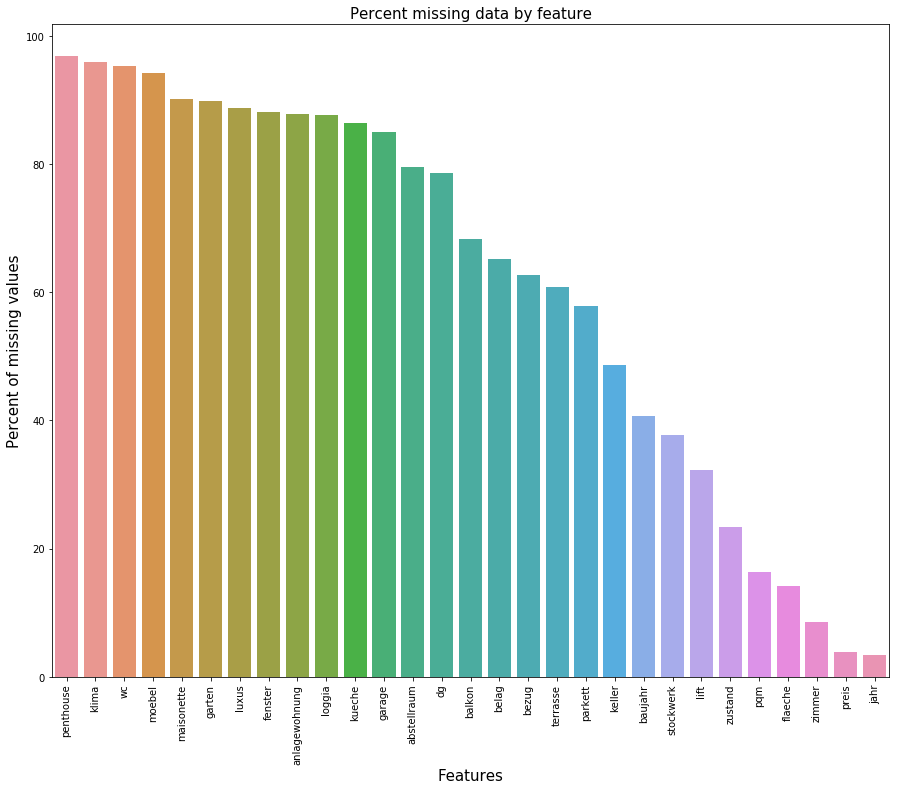

In [9]:
# Percent missing data by feature
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

## 2- Deal with missing data

How to deal with missing data?

1. drop data: 
        a. drop the whole row
        b. drop the whole column
2. replace data:
        a. replace it by mean
        b. replace it by frequency


Whole columns should be dropped only if most entries in the column are empty. In our dataset, We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different column


**Replace by mean:**

    "flaeche": 30078 missing data, replace them with mean
    "baujahr": 85966 missing data, replace them with mean
    "pqm": 34498 missing data, replace them with mean. 

  
**Replace by frequency:**

    "price": 8223 missing data, replace them frequeny.
    "stockwerk": 79562 missing data, replace them frequeny. 
    "zimmer": 17935 missing data, replace them frequeny. 
    "zustand": 49268 missing data, replace them frequeny. 
           

**Drop the whole row:**

    Nothings
    

**Drop the whole column:**
    
    "quelle": 34498 missing data, drop the whole column. 
    "balkon": 144483 missing data, drop the whole column.
    
    "terrase": 128458 missing data, drop the whole column.  
    "garten": 190003 missing data, drop the whole column.
    "wc": 201277 missing data, drop the whole column.

    "loggia": 185215 missing data, drop the whole column. 
    "keller": 102852 missing data, drop the whole column.
    "abstellraum": 168041 missing data, drop the whole column.

    "lift": 68198 missing data,drop the whole column.
    "anlagewohnung": 185701 missing data, drop the whole column.
    "dg": 166155 missing data,drop the whole column.
    "penthouse": 204837 missing data,drop the whole column.
    
    "luxus": 187643 missing data, drop the whole column.
    "fenster": 186142 missing data, drop the whole column.
    
    "belag": 137840 missing data, drop the whole column.
    "bezug": 132411 missing data, drop the whole column.
    
    "Parkett": 122406 missing data, drop the whole column.
    "garage": 179467 missing data, drop the whole column.
    "maisonette": 190639 missing data, drop the whole column.

  
    "küche": 182496 missing data,drop the whole column.
    "klima": 202716 missing data,drop the whole column.
    "mobel": 199053 missing data,drop the whole column.
    "jahr": 7259 missing data, drop the whole column.

**Replace by mean:**


In [10]:
flaeche_avg=round(df1["flaeche"].astype("float64").mean(axis=0),2)
print("Average of flaeche:",flaeche_avg)
df1["flaeche"].replace(np.nan,flaeche_avg,inplace=True)

Average of flaeche: 88.88


In [11]:
baujahr_avg=int(df1["baujahr"].astype("float64").mean(axis=0))
print("Average of baujahr:",baujahr_avg)
df1["baujahr"].replace(np.nan,baujahr_avg,inplace=True)


Average of baujahr: 1964


In [12]:
pqm_avg=round(df1["pqm"].astype("float64").mean(axis=0),2)
print("Average of Pqm:",pqm_avg)
df1["pqm"].replace(np.nan,baujahr_avg,inplace=True)

Average of Pqm: 68561517.86


**Replace by Frequency:**


In [13]:
preis_frequency=int(df1['preis'].value_counts().idxmax())
print("Frequency of prices:",preis_frequency)
df1["preis"].replace(np.nan,preis_frequency,inplace=True)

Frequency of prices: 199000


In [14]:
stockwerk_frequency=int(df1["stockwerk"].value_counts().idxmax())
print("Frequency of stockwerk:",stockwerk_frequency)
df1["stockwerk"].replace(np.nan,stockwerk_frequency,inplace=True)
df1["stockwerk"].replace("eg",0,inplace=True)
df1['stockwerk'].replace("souterrain",-1,inplace=True)
df1['stockwerk'].replace("hochparterre",1.5,inplace=True)
df1['stockwerk'].replace("mezzanine",1.5,inplace=True)



Frequency of stockwerk: 1


In [15]:
zimmer_frequency=int(df1["zimmer"].value_counts().idxmax())
print("Frequency of Zimmer:",zimmer_frequency)
df1["zimmer"].replace(np.nan,zimmer_frequency,inplace=True)

Frequency of Zimmer: 3


In [16]:
zustand_frequency=df1["zustand"].value_counts().idxmax()
print("Frequency of zustand:",zustand_frequency)
df1["zustand"].replace(np.nan,zustand_frequency,inplace=True)

Frequency of zustand: erstbezug nach neubau


**Drop the whole column**


In [17]:
df1.drop(columns=['quelle','balkon','terrasse','garten','wc','loggia','keller','abstellraum','lift','anlagewohnung','dg','penthouse','luxus','fenster'],inplace=True)

df1.drop(columns=['belag','bezug','parkett','garage','maisonette','kueche','klima','moebel','jahr'],inplace=True)

df1.reset_index(drop = True, inplace = True)


In [18]:
df1.head()

,preis,flaeche,pqm,baujahr,stockwerk,zimmer,zustand
0,50000.0,42.0,1190.476190,1964.0,1,1.5,schlecht
1,95000.0,62.0,1532.258065,1970.0,4,2.0,erstbezug nach neubau
2,95000.0,120.0,791.666667,1964.0,0,4.0,schlecht
3,90000.0,54.0,1666.666667,1966.0,0,2.0,sehr gut
4,280000.0,78.0,3589.743590,1965.0,2,3.0,sehr gut


# Data Standardization
Data is usually collected from different agencies with different formats.
(Data Standardization is also a term for a particular type of data normalization, where we subtract the mean and divide by the standard deviation)

**What is Standardization?**
<div>Standardization is the process of transforming data into a common format which allows the researcher to make the meaningful comparison.
</div>
We dont need any data standardization in the dataset

In [19]:
df1.dtypes

preis        float64
flaeche      float64
pqm          float64
baujahr      float64
stockwerk     object
zimmer       float64
zustand       object
dtype: object

In [20]:
df1["stockwerk"]=df1['stockwerk'].astype("float64")
df1['preis']=df1['preis'].astype('float64')
df1["flaeche"]=df1['flaeche'].astype("float64")
df1['zimmer']=df1['zimmer'].astype('float64')
df1['baujahr']=df1['baujahr'].astype('float64')
df1['pqm']=df1['pqm'].astype('float64')





# Data Normalization 

**Why normalization?**
<div>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variable variance is 1, or scaling variable so the variable values range from 0 to 1

In [21]:
#df.apply(lambda x:(x-np.mean(x))/(np.max(x)-np.min(x)))
min_max_scaler=preprocessing.MinMaxScaler()
normalize_group=df1[['preis','flaeche','baujahr','stockwerk','zimmer','pqm']]
df_scaled=min_max_scaler.fit_transform(normalize_group)
df2=pd.DataFrame(df_scaled)
df2.rename(index=str, columns={0: "preis", 1: "flaeche",2:'baujahr',3:'stockwerk',4:'zimmer',5:'pqm'},inplace=True)
df2['zustand'] = df1['zustand'].values

In [22]:
 df2.head()

,preis,flaeche,baujahr,stockwerk,zimmer,pqm,zustand
0,1.115250e-10,0.045931,0.941694,0.043478,0.005319,3.956767e-10,schlecht
1,2.118975e-10,0.067803,0.948295,0.108696,0.010638,5.092742e-10,erstbezug nach neubau
2,2.118975e-10,0.131231,0.941694,0.021739,0.031915,2.631250e-10,schlecht
3,2.007450e-10,0.059054,0.943894,0.021739,0.010638,5.539473e-10,sehr gut
4,6.245400e-10,0.085300,0.942794,0.065217,0.021277,1.193117e-09,sehr gut


# Distribution of Variables

Skewness: 301.007671
Kurtosis: 99768.790799

 mu = 0.00 and sigma = 0.00



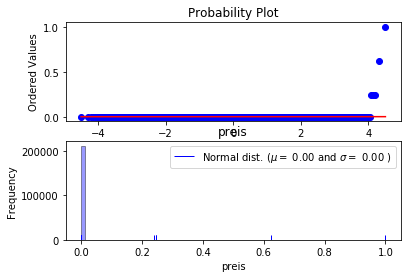

Skewness: 2.450092
Kurtosis: 12.770485

 mu = 0.10 and sigma = 0.05



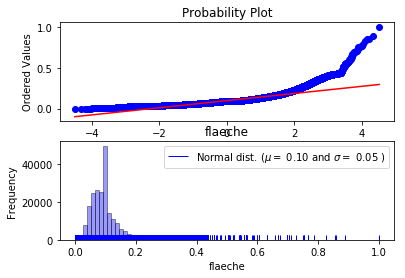

Skewness: -3.384388
Kurtosis: 52.419265

 mu = 0.94 and sigma = 0.04



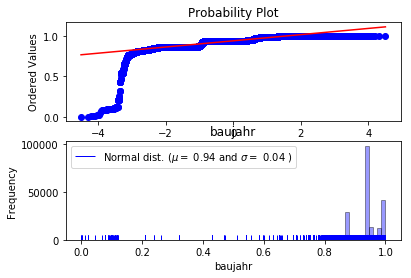

Skewness: 4.943668
Kurtosis: 64.681850

 mu = 0.06 and sigma = 0.04



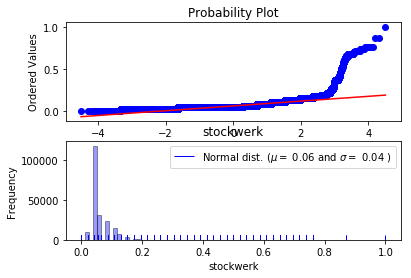

Skewness: 16.070177
Kurtosis: 543.597169

 mu = 0.02 and sigma = 0.02



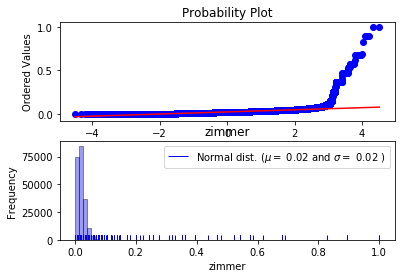

Skewness: 214.001795
Kurtosis: 46815.697165

 mu = 0.00 and sigma = 0.00



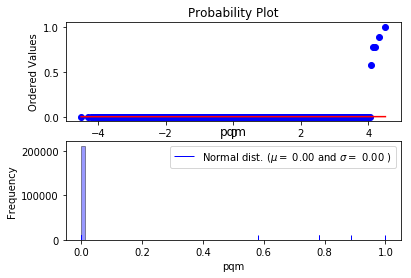

In [23]:
from scipy.stats import norm
from scipy import stats

# Plot Histogram
for i in range(0,len(df2.columns)-1):
    x=df2[df2.columns[i]]
    plt.subplot(211)
    res = stats.probplot( x, plot=plt)
    print("Skewness: %f" % x.skew())
    print("Kurtosis: %f" % x.kurt())
    
    plt.subplot(212)
    sns.distplot( x, kde=False, rug=True,bins=int(380/5), color = 'blue',hist_kws={'edgecolor':'black'})
    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(x)
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
    plt.ylabel('Frequency')
    plt.title(df2.columns.values[i])
    plt.show()


Looks like a normal distribution? Not quite! Looking at the kurtosis score, we can see that there is not a very nice peak. 

#  Binning
**Why binning?** 
<div>Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.
 </div>


In [24]:
#df['stockwerk']=df['stockwerk'].astype(float,copy=True)
#bindwidth=(max(df['stockwerk'])-min(df['stockwerk']))/4
#bins=np.arange(min(df['stockwerk']),max(df['stockwerk']),bindwidth)
#group_names=['low','medium','high']
#df['Stockwerk_bins']=pd.cut(df['stockwerk'],bins,labels=group_names,include_lowest=True)

# Bins visualization

Normally, a histogram is used to visualize the distribution of bins we created above.


In [25]:
print('Unique of Stockwerk',len(df2['stockwerk'].unique()))

Unique of Stockwerk 39


Text(0.5, 1.0, 'Stockwerk bins')

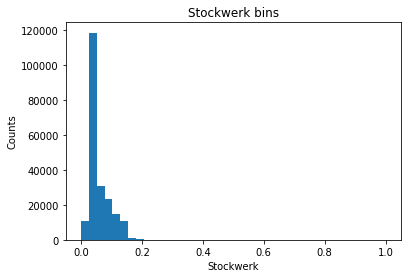

In [26]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df2['stockwerk'],bins=39)
plt.pyplot.xlabel('Stockwerk')
plt.pyplot.ylabel('Counts')
plt.pyplot.title('Stockwerk bins')

In [36]:
print('Unique of zustand',len(df2['zustand'].unique()))

Unique of zustand 8


In [38]:
print('Unique of Zimmer',len(df2['zimmer'].unique()))

Unique of Zimmer 54


Text(0.5, 1.0, 'Zimmer bin')

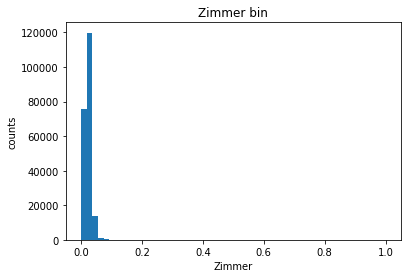

In [39]:
plt.pyplot.hist(df2['zimmer'],bins=54)
plt.pyplot.xlabel('Zimmer')
plt.pyplot.ylabel('counts')
plt.pyplot.title('Zimmer bin')

# Type of variables
for example, we can define the type of  variables  "int64" or "float64" using the method "dtypes":

In [40]:
df2.dtypes

preis        float64
flaeche      float64
baujahr      float64
stockwerk    float64
zimmer       float64
pqm          float64
zustand       object
dtype: object

# Continuous numerical variables: 

Continuous numerical variables are variables that may contain any value within some range. Continuous numerical variables can have the type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines. 

In order to start understanding the (linear) relationship between an individual variable and the price. We can do this by using "regplot", which plots the scatterplot plus the fitted regression line for the data.

# Positive linear relationship

Let's find the scatterplot of "flaeche" and "zimmer" 

C:\Users\ziaeeamir\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


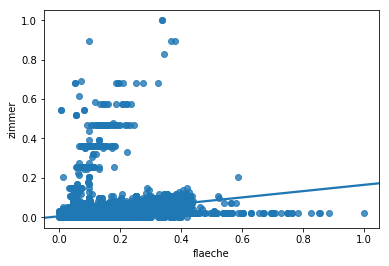

In [42]:
sns.regplot(x="flaeche", y="zimmer", data=df2)
#plt.ylim(0,)

In [43]:
df2[['flaeche', 'zimmer']].corr()

,flaeche,zimmer
flaeche,1.00000,0.44555
zimmer,0.44555,1.00000


# Negative linear relationship

C:\Users\ziaeeamir\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


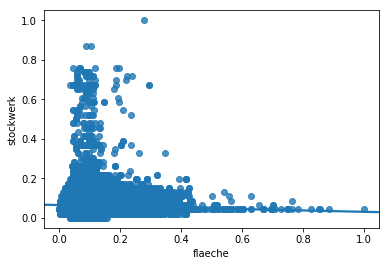

In [44]:
sns.regplot(x="flaeche", y="stockwerk", data=df2)

As the stockwerk goes up, the flaeche goes down: this indicates an inverse/ negative relationship between these two variables.

In [45]:
df2[['flaeche','stockwerk']].corr()

,flaeche,stockwerk
flaeche,1.000000,-0.046421
stockwerk,-0.046421,1.000000


# Categorical variables

These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.

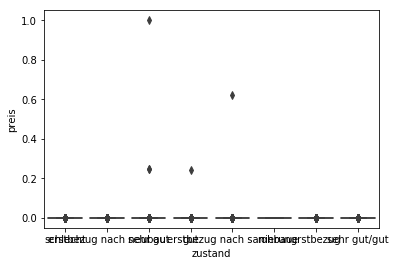

In [46]:
sns.boxplot(x="zustand", y="preis", data=df2)

We see that the distributions of price between the different zustand categories have a significant overlap, and so Zutand would not be a good predictor of price.

# Descriptive Statistical Analysis

Let's first take a look at the variables by utilising a description method.

The describe function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.

This will show:

    the count of that variable
    the mean
    the standard deviation (std)
    the minimum value
    the IQR (Interquartile Range: 25%, 50% and 75%)
    the maximum value

We can apply the method "describe" as follows:


In [47]:
df2.describe()

,preis,flaeche,baujahr,stockwerk,zimmer,pqm
count,2.112950e+05,211295.000000,211295.000000,211295.000000,211295.000000,2.112950e+05
mean,1.116099e-05,0.097198,0.942277,0.061624,0.020833,1.906726e-05
std,2.725020e-03,0.048132,0.043717,0.035309,0.017197,3.977084e-03
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,3.546495e-10,0.066709,0.941694,0.043478,0.010638,6.527715e-10
50%,5.353200e-10,0.093677,0.941694,0.043478,0.021277,9.453302e-10
75%,8.832780e-10,0.109359,0.974697,0.065217,0.021277,1.340553e-09
max,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000e+00


Value-counts is a good way of understanding how many units of each characteristic/variable we have. We can apply the "value_counts" method on the column   'zustand'. Don’t forget the method "value_counts" only works on Pandas series, not Pandas Dataframes. As a result, we only include one bracket  "df['zustand']" not two brackets "df[['zustand']]".


In [48]:
zustand_counts=df2['zustand'].value_counts().to_frame()
zustand_counts.rename(columns={'zustand':'zustand_count'},inplace=True)
zustand_counts.index.name='zustand'
zustand_counts

,zustand_count
zustand,
erstbezug nach neubau,94259
erstbezug nach sanierung,38896
sehr gut,37681
gut,20510
schlecht,13447
erstbezug,3709
sehr gut/gut,2791
rohbau,2


# Basic of Grouping
 
The "groupby" method groups data by different categories. The data is grouped based on one or several variables and analysis is performed on the individual groups.

For example, let's group by the variable "zustand". We see that there are 8 different categories of zustand

In [49]:
print(df2['zustand'].unique())
print('Unique zustand;',len(df2['zustand'].unique()))
print('unique zimmer:',len(df2['zimmer'].unique()))


['schlecht' 'erstbezug nach neubau' 'sehr gut' 'gut'
 'erstbezug nach sanierung' 'rohbau' 'erstbezug' 'sehr gut/gut']
Unique zustand; 8
unique zimmer: 54


In [50]:
df_group_one=df2[['preis','zustand']]
df_group_one=df_group_one.groupby(['zustand'],as_index=False).mean()
#grouped_pivot=df_group_one.pivot(index='zustand',columns='zimmer')
#grouped_pivot.fillna(value=0)
print(df_group_one.loc[df_group_one['preis'].idxmax()])
print(df_group_one)

zustand       sehr gut
preis      3.96109e-05
Name: 6, dtype: object
                    zustand         preis
0                 erstbezug  1.125635e-09
1     erstbezug nach neubau  1.406949e-09
2  erstbezug nach sanierung  1.604694e-05
3                       gut  1.176861e-05
4                    rohbau  9.368100e-10
5                  schlecht  4.185236e-10
6                  sehr gut  3.961094e-05
7              sehr gut/gut  8.451772e-10


From our data, it seems 'sehr gut' are, on average, the most expensive, ' erstbezug nach neubau' and 'erstbezug ' are approximately the same in price

# Correlation and Causation

**Correlation**: a measure of the extent of interdependence between variables.

**Causation**: the relationship between cause and effect between two variables.

It is important to know the difference between these two and that correlation does not imply causation. Determining  correlation is much simpler  the determining causation as causation may require independent experimentation 

## Pearson Correlation
The Pearson Correlation measures the linear dependence between two variables X and Y.
The resulting coefficient is a value between -1 and 1 inclusive, where:
- **1**: total positive linear correlation,
- **0**: no linear correlation, the two variables most likely do not affect each other
- **-1**: total negative linear correlation.


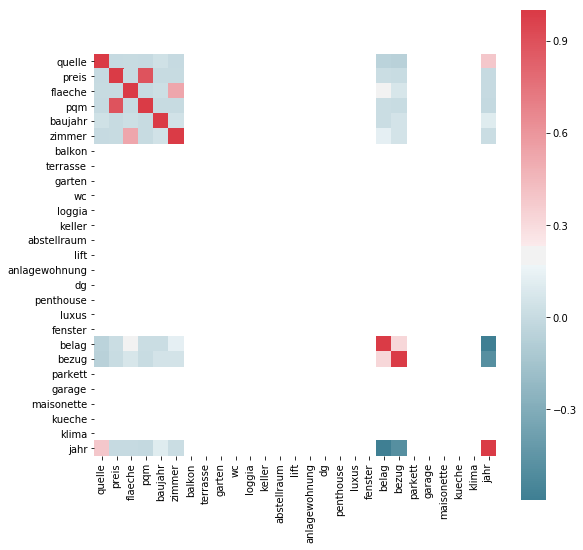

In [52]:
df3=pd.read_csv(str(os.getcwd())+"/MyData.csv")
df3.drop(labels='Unnamed: 0',axis=1,inplace=True)
from matplotlib import pyplot as pl


f, ax = pl.subplots(figsize=(9, 9))
corr = df3.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

**As youn now see above, there are not very signinificant evidence that shows a correlation between variables and preis uín the dataset **



It's a nice overview, but  is that a lot of data to look at. Let's zoom into the top 10 features most related to Price.


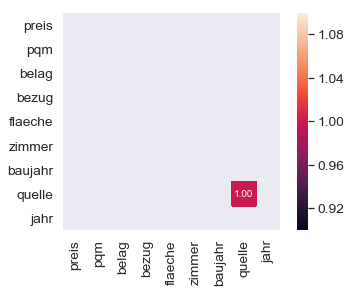

In [53]:
k = 10 #number of variables for heatmap
cols = corr.nlargest(k, 'preis')['preis'].index
cm = np.corrcoef(df3[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)



 sometimes we would like to know the significant of the correlation estimate. 

# **P-value**: 
What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant. 

By convention, when the 
- p-value is < 0.001 we say there is strong evidence that the correlation is significant,
- the p-value is < 0.05; there is moderate evidence that the correlation is significant,
- the p-value is < 0.1; there is weak evidence that the correlation is significant, and
- the p-value is > 0.1; there is no evidence that the correlation is significant.

In [54]:
from scipy import stats

In [55]:
pearson_coef, p_value = stats.pearsonr(df2['zimmer'], df2['preis'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.0003918740397303427  with a P-value of P = 0.857049696390342


**Conclusion: **

Since the p-value is > 0.1, the correlation between zimmer and preis is not statistically significant


# ANOVA: Analysis of Variance
The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

**F-test score**: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

**P-value**:  P-value tells how statistically significant is our calculated score value

If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.

## Zustand
Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.

In [56]:
df_group_two=df2[['zustand','preis']]
df_group_two=df_group_two.groupby(['zustand'],as_index=False)
df_group_two.head()

,zustand,preis
0,schlecht,1.115250e-10
1,erstbezug nach neubau,2.118975e-10
2,schlecht,2.118975e-10
3,sehr gut,2.007450e-10
4,sehr gut,6.245400e-10
5,sehr gut,6.245400e-10
6,gut,1.672875e-10
7,gut,2.118975e-10
8,sehr gut,3.680325e-10
9,erstbezug nach sanierung,1.757634e-10


In [57]:
df_group_two.get_group('erstbezug nach neubau')['preis']

1         2.118975e-10
31        2.001428e-09
53        6.468450e-11
59        8.899695e-10
76        2.185890e-10
86        9.348761e-10
87        1.123483e-09
88        8.042424e-10
89        6.459015e-10
92        2.185890e-10
98        3.100395e-10
104       6.133875e-10
107       1.092945e-09
112       1.110789e-09
120       1.494435e-10
124       7.360650e-10
129       5.833248e-10
132       4.042915e-10
133       7.058841e-10
134       3.911605e-10
147       1.556889e-09
153       9.456338e-10
161       8.715768e-10
178       1.111333e-09
180       8.548168e-10
181       2.654295e-09
184       4.535164e-10
185       6.099704e-10
186       1.024794e-09
201       1.402538e-09
              ...     
211216    4.438695e-10
211217    4.438695e-10
211218    4.438695e-10
211219    4.438695e-10
211220    4.438695e-10
211221    4.438695e-10
211222    4.438695e-10
211223    4.438695e-10
211224    4.438695e-10
211225    4.438695e-10
211226    4.438695e-10
211227    4.438695e-10
211228    4

we can use the function 'f_oneway' in the module 'stats'  to obtain the **F-test score** and **P-value**.

In [58]:
print(df2['zustand'].unique())

['schlecht' 'erstbezug nach neubau' 'sehr gut' 'gut'
 'erstbezug nach sanierung' 'rohbau' 'erstbezug' 'sehr gut/gut']


In [59]:
f_val,p_val=stats.f_oneway(df_group_two.get_group('erstbezug nach neubau')['preis']
                           ,df_group_two.get_group('erstbezug nach sanierung')['preis'])
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 2.423315558200445 , P = 0.11954405435085971


With a large F test score showing a strong correlation and a P value of almost 0 implying almost certain statistical significance. But does this mean all two tested groups are all this highly correlated? nein

# Linear Regression  

One example of a Data  Model that we will be using is 
 **Simple Linear Regression**.
Simple Linear Regression is a method to help us understand the relationship between two variables:
- The predictor/independent variable (X)
- The response/dependent variable (that we want to predict)(Y)


The result of Linear Regression is a **linear function** that predicts the response (dependent) variable as a function of the predictor (independent) variable. 

\begin{equation*}
 Y: Response \ Variable\\
 X :Predictor\ Variables
\end{equation*}


 **Linear function:**
\begin{equation*}
Yhat = a + b  X
\end{equation*}

- a refers to the **intercept** of the regression, in other words: the value of Y when X is 0 
- b refers to the **slope** of the regression line, in other words: the value with which Y changes when X increases by 1.



In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### How could pqm help us predict house price?

For this example, we want to look at how pqm can help us predict  price.
Using simple linear regression, we will create a linear function with "pqm" as the predictor variable and the "price" as the response variable.

In [62]:
X = df2[['pqm']]
Y = df2['preis']
print('Preis:')
print(Y[0:5])


Preis:
0    1.115250e-10
1    2.118975e-10
2    2.118975e-10
3    2.007450e-10
4    6.245400e-10
Name: preis, dtype: float64


In [63]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [64]:
Yhat=lm.predict(X)
print('Prediction Preis:')
print(Yhat[0:5]) 

Prediction Preis:
[-4.51809163e-07 -4.51739976e-07 -4.51889895e-07 -4.51712767e-07
 -4.51323477e-07]


C:\Users\ziaeeamir\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


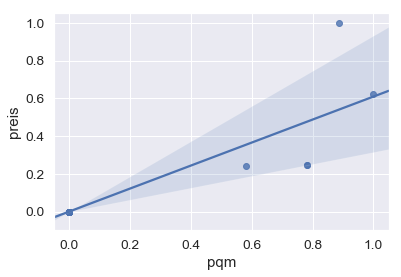

In [65]:
sns.regplot(df2['pqm'],df2['preis'])


### What are the values of the intercept and slope (a) ?

In [66]:
print('Intercept:',lm.intercept_)
print('Slope:',lm.coef_)

Intercept: -4.5205015265031113e-07
Slope: [0.60905648]


#  Multiple Linear Regression

 What if we want to predict house price using more than one variable? 

If we want to use more variables in our model to predict house price, we can use **Multiple Linear Regression**.
Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and *two or more* predictor (independent) variables.
Most of the real-world regression models involve multiple predictors. We illustrate the structure by using four predictor variables, but these results can generalize to any integer :

 \begin{equation*}
Y: Response \ Variable\\
X_1 :Predictor\ Variable \ 1\\
X_2: Predictor\ Variable \ 2\\
X_3: Predictor\ Variable \ 3\\
X_4: Predictor\ Variable \ 4\\
\end{equation*}


 \begin{equation*}
a: intercept\\
b_1 :coefficients \ of\ Variable \ 1\\
b_2: coefficients \ of\ Variable \ 2\\
b_3: coefficients \ of\ Variable \ 3\\
b_4: coefficients \ of\ Variable \ 4\\
\end{equation*}


 \begin{equation*}
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
\end{equation*}

From the previous section  we know that other good predictors of price could be: 
- flaeche
- baujahr
- stockwerk
- pqm

Let's develop a model using these variables as the predictor variables.

In [67]:
lm1 = LinearRegression()
z=df2[['zimmer','stockwerk','baujahr','pqm']]

In [68]:
lm1.fit(z,df2['preis'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [71]:
print('Intercept:',lm1.intercept_)
print('Slope:',lm1.coef_)

Intercept: -1.300177418384107e-05
Slope: [ 1.67405710e-04 -1.05026523e-04  1.64858160e-05  6.09058006e-01]


How do we visualise a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualise it with regression or residual plot. 

One way to look at the fit of the model is by looking at the **distribution plot**: We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

C:\Users\ziaeeamir\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


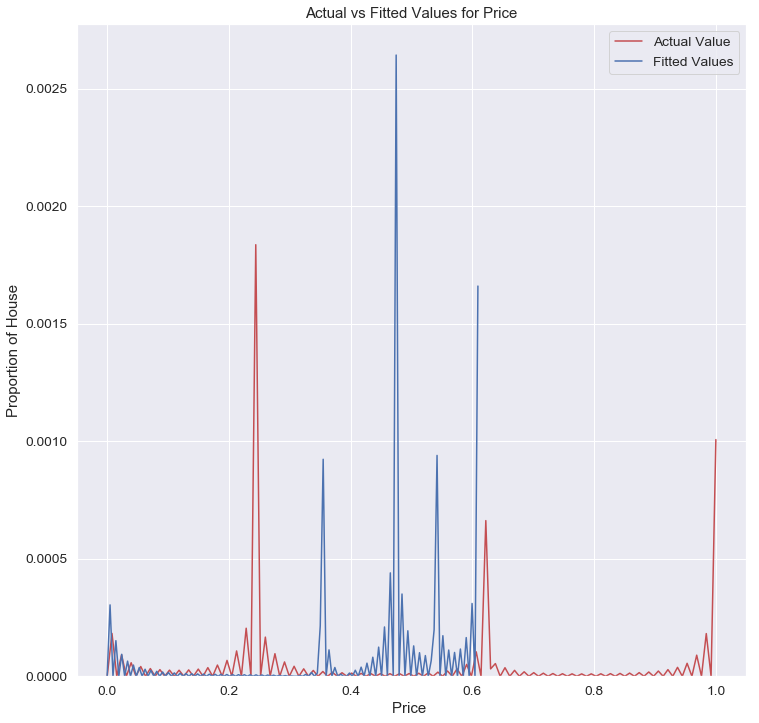

In [84]:
import matplotlib.pyplot as plt
Y_hat = lm1.predict(z)

plt.figure(figsize=(12, 12))
ax1 = sns.distplot(df2['preis'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price ')
plt.ylabel('Proportion of House')

plt.show()
plt.close()


# Polynomial Regression 

**Polynomial regression** is a particular case of the general linear regression model or multiple linear regression models. 
We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.

There are different orders of polynomial regression:
    

<center>**Quadratic - 2nd order**</center>


 \begin{equation*}
Yhat = a + b_1 X^2 +b_2 X^2 
\\
\end{equation*}


 <center>**Cubic - 3rd order**</center>
 
 
 \begin{equation*}
Yhat = a + b_1 X^2 +b_2 X^2 +b_3 X^3\\
\end{equation*}

<center> **Higher order**:</center>


 \begin{equation*}
Y = a + b_1 X^2 +b_2 X^2 +b_3 X^3 ....\\
\end{equation*}

We saw earlier that a linear model did not provide the best fit while using highway-mpg as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.

 We will use the following function to plot the data:

In [85]:
def PlotPolly(model,independent_variable,dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable,dependent_variabble,'.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of house')

    plt.show()
    plt.close()
    
print("done")

done


In [86]:
x=df2['pqm'].astype(np.int64)
y=df2['preis'].astype(np.int64)

In [87]:
f=np.polyfit(x,y,6)
p=np.poly1d(f)

C:\Users\ziaeeamir\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


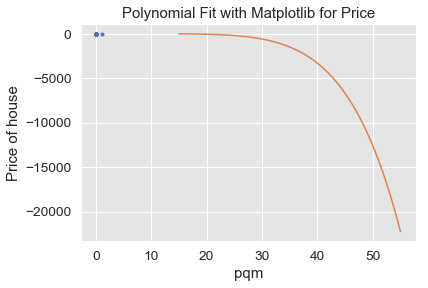

In [88]:
PlotPolly(p,x,y,'pqm')

# Measures for In-Sample Evaluation

When evaluating our models, not only do we want to visualise the results, but we also want a quantitative measure to determine how accurate the model is.

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

- **R^2 / R-squared**
- **Mean Squared Error (MSE)**

**R-squared**

R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.
The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.



**Mean Squared Error (MSE)**

The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).

##### Model 1:Linear Regression

In [89]:
# Find the R^2
lm.score(X, Y)

0.7901424796219645

In [90]:
#Find mean_squared_error
from sklearn.metrics import mean_squared_error
mean_squared_errors=mean_squared_error(df2['preis'],Yhat)
print('mean_squared_error:',mean_squared_errors)

mean_squared_error: 1.558338596789699e-06


##### Model 2: Multiple Linear Regression

In [91]:
lm1.score(z,df2['preis'])

0.7901456042014661

In [92]:
mean_squared_errors2=mean_squared_error(df2['preis'],Y_hat)
print('mean_squared_error:',mean_squared_errors2)

mean_squared_error: 1.558315394605535e-06


##### Model 3: Polynomial Fit

In [93]:
from sklearn.metrics import r2_score

In [94]:
r_squared=r2_score(y,p(x))
r_squared

2.2398749521812533e-11

In [95]:
mean_squared_error(df2['preis'], p(x))

7.425767411784204e-06

# Model Evaluation and Refinement 

In [96]:
from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual
print("done")

done


C:\Users\ziaeeamir\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


#### Functions for plotting 

In [97]:
def DistributionPlot(RedFunction,BlueFunction,RedName,BlueName,Title ):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price')
    plt.ylabel('Proportion of House')

    plt.show()
    plt.close()
    

In [98]:
def PollyPlot(xtrain,xtest,y_train,y_test,lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(),xtest.values.max()])

    xmin=min([xtrain.values.min(),xtest.values.min()])

    x=np.arange(xmin,xmax,0.1)


    plt.plot(xtrain,y_train,'ro',label='Training Data')
    plt.plot(xtest,y_test,'go',label='Test Data')
    plt.plot(x,lr.predict(poly_transform.fit_transform(x.reshape(-1,1))),label='Predicted Function')
    plt.ylim([-10000,60000])
    plt.ylabel('Price')
    plt.legend()


# Training and Testing


In [99]:
df4=df2._get_numeric_data()

<a id="ref1"></a>

# Part 1: Training and Testing

An important step in testing your model is to split your data into training and testing data. We will place the target data **price** in a separate dataframe **y**:

In [100]:
y_data=df4['preis']
x_data=df4.drop('preis',axis=1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=.15,random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 31695
number of training samples: 179600


In [101]:
lrm_f=LinearRegression()
lrm_f.fit(x_train[['pqm']],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [102]:
lrm_f.score(x_test[['pqm']],y_test)

-7.475232331085719

we can see the R^2 is much smaller using the test data.

# Cross-validation Score 

In [103]:
from sklearn.model_selection import cross_val_score

We input the object, the feature in this case ' flaeche', the target data (y_data). The parameter 'cv'  determines the number of folds; in this case 4. 

In [104]:
Rcross=cross_val_score(lrm_f,x_data[['flaeche']], y_data,cv=4)
Rcross

array([-6.70846407e-05, -7.70701360e+05, -3.11662704e+05, -2.57349508e+04])

### Linear Model

Let's create Multiple linear regression objects and train the model using **'Zimmer'**, **'Baujahr'**, **'Stockwerk'** and **'Flaeche'** as features.

In [108]:
lr=LinearRegression()
lr.fit(x_train[['flaeche', 'pqm', 'stockwerk', 'zimmer']],y_train)
yhat_train=lr.predict(x_train[['flaeche', 'baujahr', 'stockwerk', 'zimmer']])
print('Train',yhat_train[0:5])
yhat_test=lr.predict(x_test[['flaeche', 'baujahr', 'stockwerk', 'zimmer']])
print('Test',yhat_test[0:5])

Train [0.6016925  0.57087229 0.56818008 0.53066678 0.5661722 ]
Test [0.5735479  0.58090672 0.60838757 0.57354241 0.57353657]


C:\Users\ziaeeamir\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


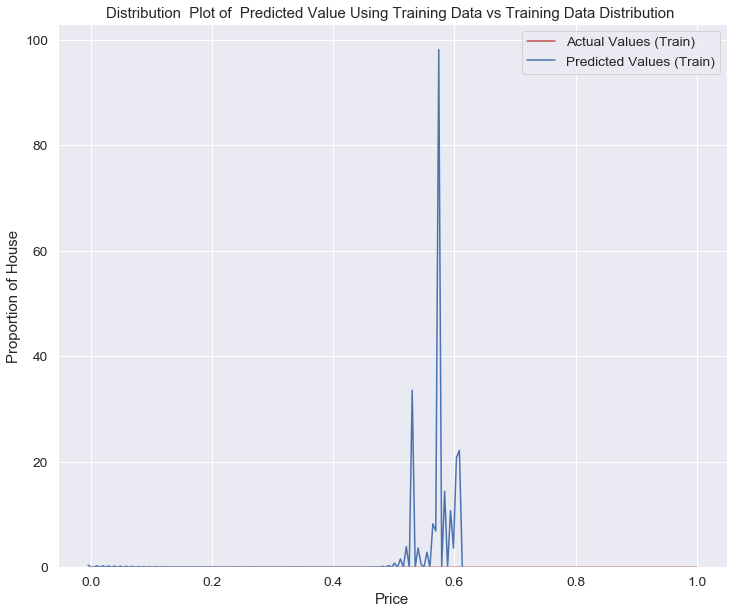

In [109]:
Title='Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution '
DistributionPlot(y_train,yhat_train,"Actual Values (Train)","Predicted Values (Train)",Title)

C:\Users\ziaeeamir\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


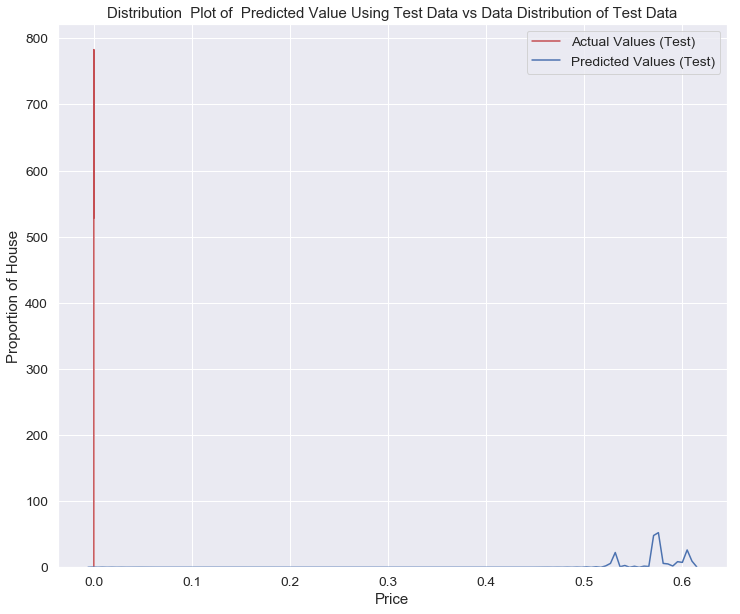

In [110]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

### PolynomialFeatures

In [111]:
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=5)
x_train_pr=pr.fit_transform(x_train[['pqm']])
x_test_pr=pr.fit_transform(x_test[['pqm']])
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)

In [112]:
poly=LinearRegression()
poly.fit(x_train_pr,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Let's take the first five predicted values and compare it to the actual targets. 

In [113]:
yhat=poly.predict(x_test_pr )
yhat[0:5]

array([8.94776834e-10, 1.10781905e-09, 1.17578820e-09, 1.01110550e-09,
       1.15255675e-09])

In [114]:
print("Predicted values:", yhat[0:4])
print("True values:",y_test[0:4].values)

Predicted values: [8.94776834e-10 1.10781905e-09 1.17578820e-09 1.01110550e-09]
True values: [4.43869484e-10 9.70267466e-10 7.88258672e-10 3.74277887e-10]


We will use the function "PollyPlot" that we defined at the beginning of the lab to display the training data, testing data, and the predicted function.

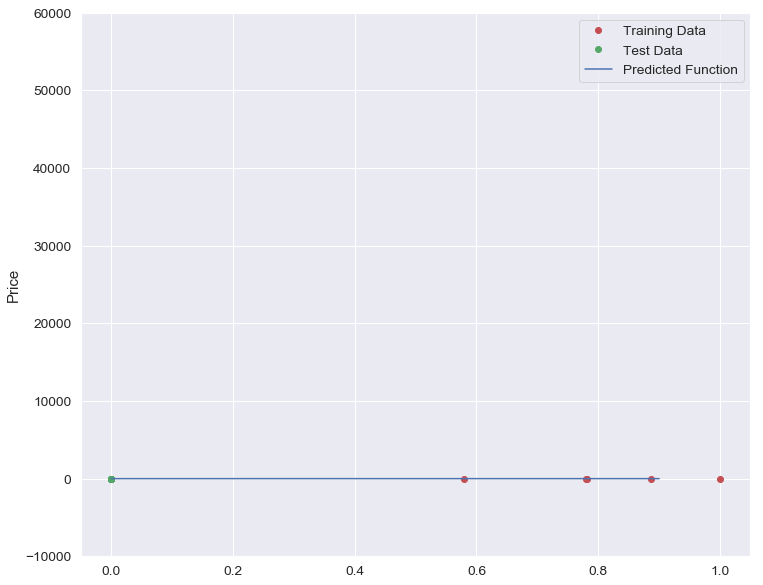

In [115]:
PollyPlot(x_train[['pqm']],x_test[['pqm']],y_train,y_test,poly,pr)